In [24]:
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

- REMOVE STOPWORDS AND PUNCTUATION

In [94]:
sentances = pd.read_csv('../data/merged.csv')
sentances

,Headline,URL,Date,DetailNews,avg retail price/ Kg
0,CTC mulls closing Lankan fag production plants,https://www.dailynews.lk/2016/08/01/business/8...,08/01/2016,With a proposed 90% tax in the offing for ciga...,70
1,Thousands joining Paada Yatra purely to protes...,https://www.dailynews.lk/2016/08/01/political/...,08/01/2016,It is not for a physical exercise but to prote...,70
2,Car topples into paddy field; no injuries,https://www.dailynews.lk/2016/08/02/local/89244,08/02/2016,A car plying on the Hakmana Mulatiyana road ...,70
3,Flower vendor near Ruwanweliseya turns heroin ...,https://www.dailynews.lk/2016/08/02/law-order/...,08/02/2016,A flower vendor near the Ruwanweliseya in Anur...,70
4,Trade deficit narrows on rice vehicle import ...,https://www.dailynews.lk/2016/08/02/business/8...,08/02/2016,Sri Lanka’s external sector has recorded a mod...,70
...,...,...,...,...,...
2092,Black marketeers controlling prices - Ruwan,https://www.dailynews.lk/2021/10/12/local/2617...,10/12/2021,The Government has handed over the determining...,135
2093,Opposition theatrics won’t fool people -Johnston,https://www.dailynews.lk/2021/10/12/local/2616...,10/12/2021,Various theatrics by the Opposition such as wa...,135
2094,Govt. should empower local milk powder manufac...,https://www.dailynews.lk/2021/10/12/business/2...,10/12/2021,The National Movement for Consumer Rights Prot...,135
2095,Organic fertilizer required for Maha Season fr...,https://www.dailynews.lk/2021/10/12/local/2617...,10/12/2021,The Agriculture Ministry has taken all necessa...,135


In [95]:
sentances.dtypes

Headline                object
URL                     object
Date                    object
DetailNews              object
avg retail price/ Kg     int64
dtype: object

In [96]:
# remove link column
sentances.drop(labels=['URL'], axis=1, inplace=True)
sentances

,Headline,Date,DetailNews,avg retail price/ Kg
0,CTC mulls closing Lankan fag production plants,08/01/2016,With a proposed 90% tax in the offing for ciga...,70
1,Thousands joining Paada Yatra purely to protes...,08/01/2016,It is not for a physical exercise but to prote...,70
2,Car topples into paddy field; no injuries,08/02/2016,A car plying on the Hakmana Mulatiyana road ...,70
3,Flower vendor near Ruwanweliseya turns heroin ...,08/02/2016,A flower vendor near the Ruwanweliseya in Anur...,70
4,Trade deficit narrows on rice vehicle import ...,08/02/2016,Sri Lanka’s external sector has recorded a mod...,70
...,...,...,...,...
2092,Black marketeers controlling prices - Ruwan,10/12/2021,The Government has handed over the determining...,135
2093,Opposition theatrics won’t fool people -Johnston,10/12/2021,Various theatrics by the Opposition such as wa...,135
2094,Govt. should empower local milk powder manufac...,10/12/2021,The National Movement for Consumer Rights Prot...,135
2095,Organic fertilizer required for Maha Season fr...,10/12/2021,The Agriculture Ministry has taken all necessa...,135


In [97]:
news_lines = list(sentances['DetailNews'])
labels = list(sentances['avg retail price/ Kg'])

In [98]:
# stop words
stop_words = pd.read_csv('../data/stop_words_english.txt', sep='\n', header=None)
stop_words = list(stop_words[0])
stop_words.append('\u200b')

In [99]:
# punctuation list to remove from news sentences
table = str.maketrans('', '', string.punctuation)
table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [100]:
processed_news = []

for item in news_lines:
    text = str(item.lower())
    soup = BeautifulSoup(text)
    text = soup.get_text()
    words = text.split()
    filtered_text = ''

    for word in words:
        word = word.translate(table)

        if word not in stop_words:
            filtered_text = filtered_text + word + ' '

    processed_news.append(filtered_text)

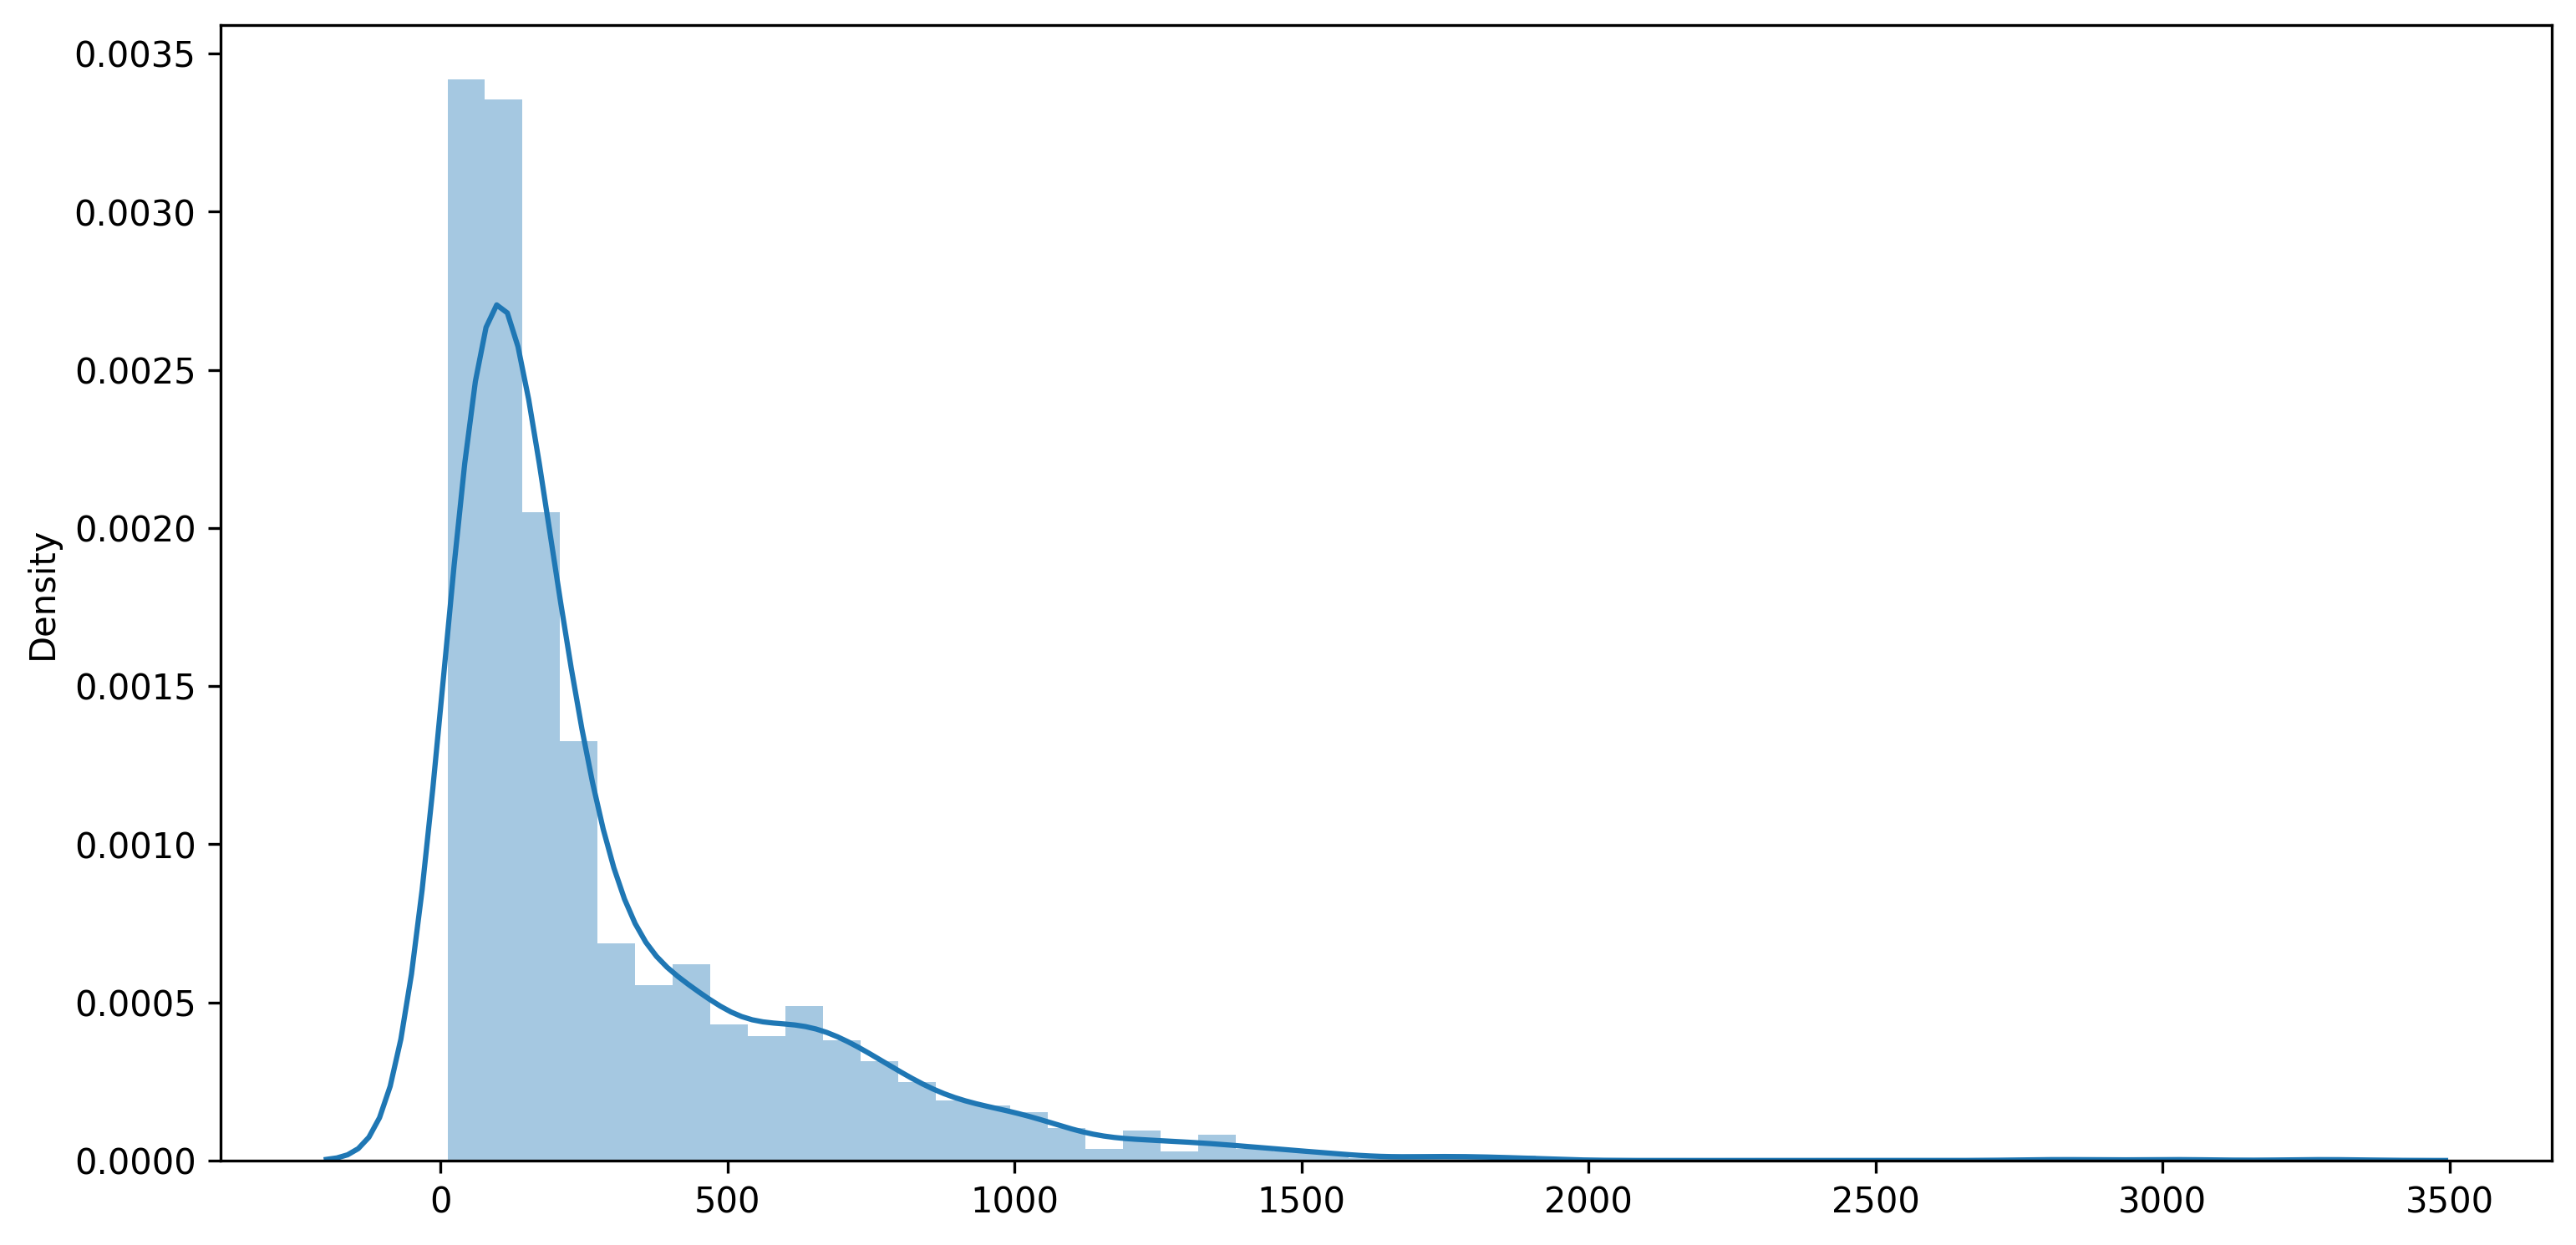

In [101]:
# distribution of word counts in each sentences
warnings.filterwarnings(action='ignore')

word_counts = []

for text in processed_news:
    counts = len(text.strip().split())
    word_counts.append(counts)

plt.figure(figsize=[12, 6], dpi=300)
sns.distplot(a=word_counts)
plt.show()

- TOKENIZATION

In [102]:
tokenizer = Tokenizer(num_words=25000, oov_token='<OOV>')
tokenizer.fit_on_texts(processed_news)

In [103]:
sequences = tokenizer.texts_to_sequences(processed_news)

In [104]:
padded = pad_sequences(sequences, padding='post', maxlen=1000, truncating='post')
padded, len(padded)

(array([[ 354, 1281,  327, ...,    0,    0,    0],
        [1412, 1849, 1900, ...,    0,    0,    0],
        [2206, 7477, 7042, ...,    0,    0,    0],
        ...,
        [  22, 1124,  367, ...,    0,    0,    0],
        [  15,   35,  122, ...,    0,    0,    0],
        [  82,   35,   76, ...,    0,    0,    0]]),
 2097)

In [105]:
tokenizer.word_index

{'<OOV>': 1,
 'paddy': 2,
 'government': 3,
 'sri': 4,
 'minister': 5,
 'water': 6,
 'lanka': 7,
 'country': 8,
 'people': 9,
 'farmers': 10,
 'development': 11,
 'president': 12,
 'rice': 13,
 '000': 14,
 'agriculture': 15,
 'rs': 16,
 '”': 17,
 'time': 18,
 'land': 19,
 'project': 20,
 'district': 21,
 'national': 22,
 'years': 23,
 'food': 24,
 'public': 25,
 'fertilizer': 26,
 'area': 27,
 'cultivation': 28,
 'year': 29,
 'production': 30,
 'programme': 31,
 'cabinet': 32,
 'lands': 33,
 'areas': 34,
 'ministry': 35,
 'local': 36,
 'irrigation': 37,
 'department': 38,
 'price': 39,
 'provide': 40,
 'season': 41,
 'rajapaksa': 42,
 'agricultural': 43,
 'economic': 44,
 'sector': 45,
 'organic': 46,
 'high': 47,
 'day': 48,
 'ministers': 49,
 'market': 50,
 'fields': 51,
 'work': 52,
 'maha': 53,
 '–': 54,
 'prices': 55,
 'crops': 56,
 'including': 57,
 'management': 58,
 'general': 59,
 'economy': 60,
 'rural': 61,
 'parliament': 62,
 'colombo': 63,
 'increase': 64,
 'foreign': 65,


In [106]:
training_sentences = padded[:1600]
testing_sentences = padded[1600:]

training_labels = labels[:1600]
testing_labels = labels[1600:]

In [107]:
training_padded = np.array(training_sentences)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_sentences)
testing_labels = np.array(testing_labels)

In [108]:
len(training_padded), len(training_labels), len(testing_padded), len(testing_labels)

(1600, 1600, 497, 497)

- MODELING

In [124]:

# creating a model for sentiment analysis
model = tf.keras.Sequential([tf.keras.layers.Dense(36, input_shape=[1000], activation='relu'),
                             tf.keras.layers.Dense(24, input_shape=[1000], activation='relu'),
                             tf.keras.layers.Dense(12, input_shape=[1000], activation='relu'),
                             tf.keras.layers.Dense(1)
                             ])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 36)                36036     
_________________________________________________________________
dense_23 (Dense)             (None, 24)                888       
_________________________________________________________________
dense_24 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 13        
Total params: 37,237
Trainable params: 37,237
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(training_padded, training_labels, epochs=50,
          validation_data=(testing_padded, testing_labels))

Epoch 1/50
50/50 [==============================] - 0s 5ms/step - loss: 538173.5000 - val_loss: 94667.0312
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 57944.1055 - val_loss: 49030.3984
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 27981.8730 - val_loss: 35677.1445
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 17095.3750 - val_loss: 31237.8164
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 

In [126]:
model.predict(testing_padded)

array([[ 1.53393280e+02],
       [-6.27976074e+01],
       [ 4.51784363e+01],
       [ 1.06515411e+02],
       [ 4.66318665e+01],
       [ 2.95222870e+02],
       [ 4.31631470e+01],
       [ 5.15555115e+01],
       [-1.15302448e+01],
       [-1.78846832e+02],
       [ 8.73602371e+01],
       [ 1.65733246e+02],
       [ 1.74669022e+02],
       [ 1.43835030e+01],
       [ 5.34710274e+01],
       [ 5.62679443e+01],
       [ 1.79824081e+02],
       [ 8.92940369e+01],
       [ 4.47714081e+01],
       [ 1.21387054e+02],
       [ 7.64549789e+01],
       [ 2.47763367e+02],
       [-5.36958456e-01],
       [ 8.28834381e+01],
       [ 2.55372601e+01],
       [ 9.76314774e+01],
       [ 2.49023071e+02],
       [-4.79077148e+01],
       [ 1.41212021e+02],
       [ 6.09743652e+01],
       [-3.51254059e+02],
       [ 5.07747498e+01],
       [ 3.44070740e+01],
       [ 1.02358490e+02],
       [ 6.73637085e+01],
       [ 1.01132759e+02],
       [-7.26421509e+01],
       [ 6.91922302e+01],
       [ 2.0